In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cpi = pd.read_excel("consumer-price-inflation.xlsx")
chi = pd.read_excel("chicago-unemp.xlsx")
htn = pd.read_excel("houston-unemp.xlsx")
phx = pd.read_excel("phoenix-unemp.xlsx")
la = pd.read_excel("los-angeles-unemp.xlsx")
ny = pd.read_excel("new-york-unemp.xlsx")

In [10]:
cpi.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.890000,-0.474,3.58,4.257,1.222000,0.744000,5.520000,3.363,1.712000,Annual average inflation
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.510000,25.510000,-12.520000,-10.680000,10.230000,...,4.380000,4.976,0.63,2.302,5.443000,5.062000,10.600000,-7.714,-6.601186,Annual average inflation
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.970000,5.780000,15.800000,15.670000,27.420000,...,32.377731,29.844,19.63,17.079,21.024000,23.846111,23.826819,13.639,28.240495,Annual average inflation
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.291234,1.987,2.03,1.411,1.620887,2.041472,6.725203,4.769,2.214490,Annual average inflation
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.984699,21.984699,21.984699,21.984699,21.984699,...,1.619795,1.967,3.06,-1.931,-2.079403,0.180000,4.827889,1.624,1.663365,Annual average inflation


In [20]:
cpi_us = cpi[cpi['Country'] == 'United States'].copy()
cpi_us.drop(columns=['Country Code', 'IMF Country Code', 'Indicator Type', 'Series Name', 'Note', 'Country'], inplace=True)
cpi_us.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
190,5.8953,4.292765,3.272283,6.177756,11.054799,9.143152,5.744812,6.501684,7.63096,11.254475,...,0.118625,1.261581,2.136,2.44,1.812,1.233584,4.697859,8.0028,4.128,2.949511


In [21]:
cpi_us_t = cpi_us.T
cpi_us_t = cpi_us_t.reset_index().rename(columns={'index': 'Year', 190: 'CPI'})
cpi_us_t.head()

,Year,CPI
0,1970,5.895300
1,1971,4.292765
2,1972,3.272283
3,1973,6.177756
4,1974,11.054799


In [80]:
cpi_us_t.shape

(55, 1)

In [29]:
print(chi.shape)
chi.head()

(427, 6)


,Year,Period,labor force,employment,unemployment,unemployment rate
0,1990,Jan,4165050,3877704,287346,6.9
1,1990,Feb,4158474,3883640,274834,6.6
2,1990,Mar,4158961,3895016,263945,6.3
3,1990,Apr,4159901,3887001,272900,6.6
4,1990,May,4168759,3910275,258484,6.2


In [28]:
print(htn.shape)
htn.head()

(427, 6)


,Year,Period,labor force,employment,unemployment,unemployment rate
0,1990,Jan,1984076,1881055,103021,5.2
1,1990,Feb,1988590,1886513,102077,5.1
2,1990,Mar,1997856,1903040,94816,4.7
3,1990,Apr,2012121,1916293,95828,4.8
4,1990,May,2032188,1933128,99060,4.9


In [30]:
print(phx.shape)
phx.head()

(427, 6)


,Year,Period,labor force,employment,unemployment,unemployment rate
0,1990,Jan,1146957,1094079,52878,4.6
1,1990,Feb,1148735,1098870,49865,4.3
2,1990,Mar,1150741,1101568,49173,4.3
3,1990,Apr,1152870,1103587,49283,4.3
4,1990,May,1158722,1108526,50196,4.3


In [31]:
print(la.shape)
la.head()

(427, 6)


,Year,Period,labor force,employment,unemployment,unemployment rate
0,1990,Jan,5922433,5612177,310256,5.2
1,1990,Feb,5939564,5643174,296390,5.0
2,1990,Mar,5941583,5655980,285603,4.8
3,1990,Apr,5893238,5605138,288100,4.9
4,1990,May,5900287,5611520,288767,4.9


In [32]:
print(ny.shape)
ny.head()

(595, 8)


,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate
0,1976,Jan,58.1,52.1,7661586,6872892,788694,10.3
1,1976,Feb,58.0,52.1,7659445,6871925,787520,10.3
2,1976,Mar,58.0,52.1,7660215,6875212,785003,10.2
3,1976,Apr,58.0,52.1,7667961,6885824,782137,10.2
4,1976,May,58.1,52.2,7679696,6898103,781593,10.2


In [24]:
# Percent missing values in each dataset
print((chi.isnull().sum() / len(chi)) * 100)
print((htn.isnull().sum() / len(htn)) * 100)
print((ny.isnull().sum() / len(ny)) * 100)
print((la.isnull().sum() / len(la)) * 100)
print((phx.isnull().sum() / len(phx)) * 100)
print((cpi_us_t.isnull().sum() / len(cpi_us_t)) * 100)

Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                              0.0
Period                            0.0
labor force participation rate    0.0
employment-population ratio       0.0
labor force                       0.0
employment                        0.0
unemployment                      0.0
unemployment rate                 0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year    0.0
CPI     0

## Exploratory Data Analysis

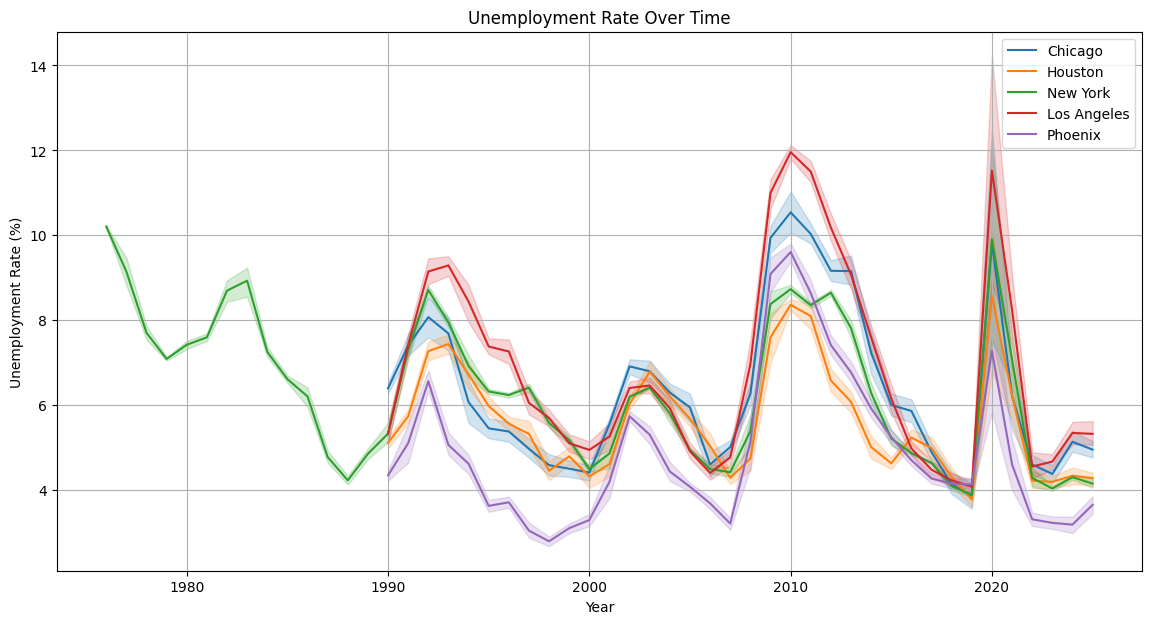

In [35]:
# Unemployment Rate Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=chi, x='Year', y='unemployment rate', label='Chicago')
sns.lineplot(data=htn, x='Year', y='unemployment rate', label='Houston')
sns.lineplot(data=ny, x='Year', y='unemployment rate', label='New York')
sns.lineplot(data=la, x='Year', y='unemployment rate', label='Los Angeles')
sns.lineplot(data=phx, x='Year', y='unemployment rate', label='Phoenix')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid()
plt.show()  

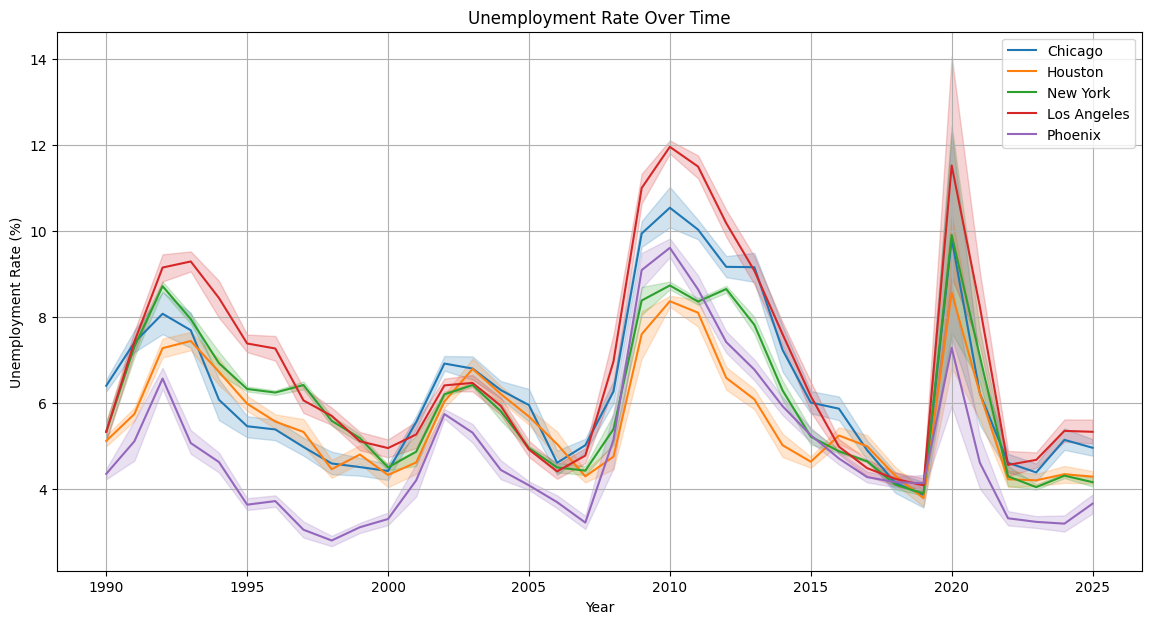

In [34]:
# Unemployment Rate Over Time with NY filtered 1990 onwards

plt.figure(figsize=(14, 7))
sns.lineplot(data=chi, x='Year', y='unemployment rate', label='Chicago')
sns.lineplot(data=htn, x='Year', y='unemployment rate', label='Houston')

nyc_filtered = ny[ny['Year'] >= 1990]
sns.lineplot(data=nyc_filtered, x='Year', y='unemployment rate', label='New York')
sns.lineplot(data=la, x='Year', y='unemployment rate', label='Los Angeles')
sns.lineplot(data=phx, x='Year', y='unemployment rate', label='Phoenix')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid()
plt.show()  

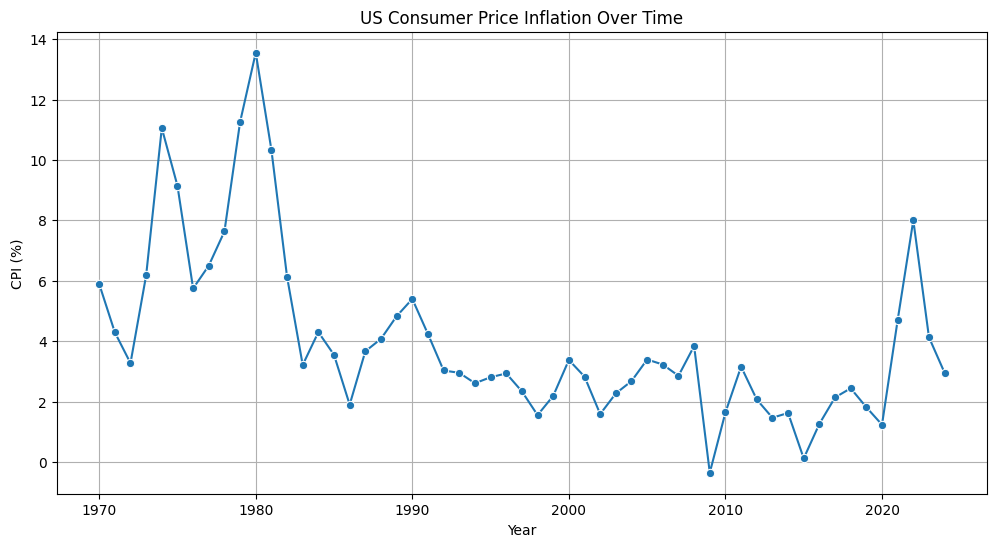

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cpi_us_t, x='Year', y='CPI', marker='o')
plt.title('US Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('CPI (%)')
plt.grid()
plt.show()